## Preliminary/Exploratory Analysis of the Data

In [2]:
# Load necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset

diabetes = pd.read_csv("../data/raw/diabetes_data_upload.csv")
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
diabetes.columns = diabetes.columns.str.strip().str.lower().str.replace(" ", "_")


### Data Inspection

In [7]:
# Summary of data types and missing values

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

In [8]:
# Check for missing or null values

diabetes.isnull().sum()     # there are no missing/null values

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [9]:
# View unique values in each column

for col in diabetes.columns:
    print(f"{col}: {diabetes[col].unique()}")

age: [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
gender: ['Male' 'Female']
polyuria: ['No' 'Yes']
polydipsia: ['Yes' 'No']
sudden_weight_loss: ['No' 'Yes']
weakness: ['Yes' 'No']
polyphagia: ['No' 'Yes']
genital_thrush: ['No' 'Yes']
visual_blurring: ['No' 'Yes']
itching: ['Yes' 'No']
irritability: ['No' 'Yes']
delayed_healing: ['Yes' 'No']
partial_paresis: ['No' 'Yes']
muscle_stiffness: ['Yes' 'No']
alopecia: ['Yes' 'No']
obesity: ['Yes' 'No']
class: ['Positive' 'Negative']


In [10]:
# Count of Positive/Negative by class

diabetes.groupby('class').size()

class
Negative    200
Positive    320
dtype: int64

In [11]:
# Count of Female/Male by Gender

diabetes.groupby('gender').size()

gender
Female    192
Male      328
dtype: int64

In [12]:
# Percentage count of positive vs. negative cases to check for class imbalance

class_counts = diabetes['class'].value_counts(normalize = True)
class_counts

# roughly 62% positive and roughly 38% negative
# so we have a ratio of 60:40
    # managing class imbalance: this ratio is not too severe but it would still be important to monitor its impact on the model performance
    # especially given the fact that this minority class is 'negative'
        # its the positive cases that are really important in identifying so if we had issues with our classifiers accuracy, this is something we would want to consider

class
Positive    0.615385
Negative    0.384615
Name: proportion, dtype: float64

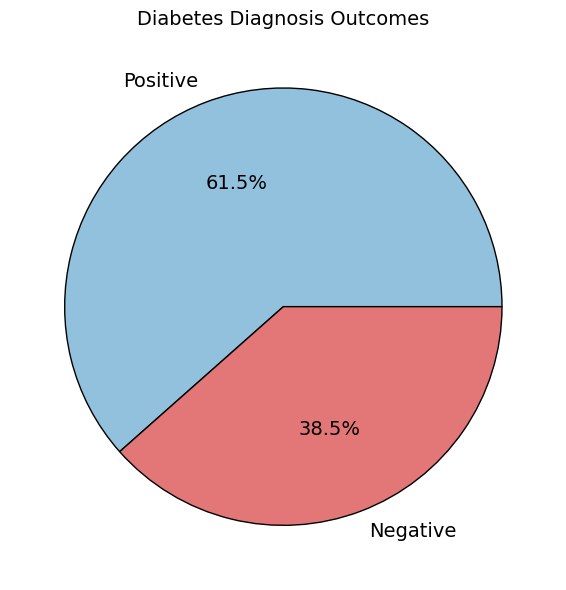

In [13]:
# Create pie chart to show class_counts
colors = [
    "#0071B26E",
    "#E37676",
]

plt.figure(figsize=(6, 6))

plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 14}
)

plt.title("Diabetes Diagnosis Outcomes", fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
# Percentage count of male vs. female observations to check for class imbalance

gender_counts = diabetes['gender'].value_counts(normalize = True)
gender_counts

# roughly 63% male and roughly 37% female
# so we have a ratio of 60:40 again
    # there is a clear gender imbalance in the dataset where there is more data for male patients than female patients
    # this means analyses or models may be more reflective of male symptom patterns unless we adjust 
        # (e.g., stratify by gender or bootstrapping)

gender
Male      0.630769
Female    0.369231
Name: proportion, dtype: float64

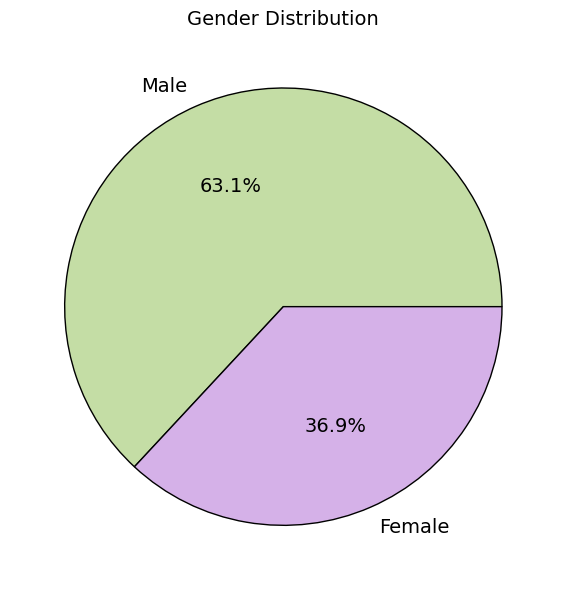

In [15]:
# Create pie chart to show gender_counts
colors = [
    "#C4DDA5FF",
    "#D5B1E8",
]

plt.figure(figsize=(6, 6))

plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 14}
)

plt.title("Gender Distribution", fontsize=14)
plt.tight_layout()
plt.show()

In [16]:
# Summary statistics for Age column

diabetes.describe()

# average age within dataset is 48 with a standard deviation of 12.15
    # youngest age being 16
    # oldest age being 90
    # median age is 47.5   

,age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [17]:
# Summary statistics to include categorical columns

diabetes.describe(include='object')

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [18]:
# Count of positive/negative by gender

pd.crosstab(diabetes['gender'], diabetes['class'])

class,Negative,Positive
gender,,
Female,19,173
Male,181,147


In [ ]:
# One-hot encoding

diabetes_encoded = pd.read_csv("#../data/processed/diabetes_data_encoded.csv")

In [21]:
# Correlation matrix

diabetes_encoded.corr()['diabetes'].sort_values(ascending=False)

# closer to 1 or -1 shows a strong positive/negative association

diabetes              1.000000
polyuria              0.665922
polydipsia            0.648734
sudden_weight_loss    0.436568
partial_paresis       0.432288
polyphagia            0.342504
irritability          0.299467
visual_blurring       0.251300
weakness              0.243275
muscle_stiffness      0.122474
genital_thrush        0.110288
age                   0.108679
obesity               0.072173
delayed_healing       0.046980
itching              -0.013384
alopecia             -0.267512
gender               -0.449233
Name: diabetes, dtype: float64

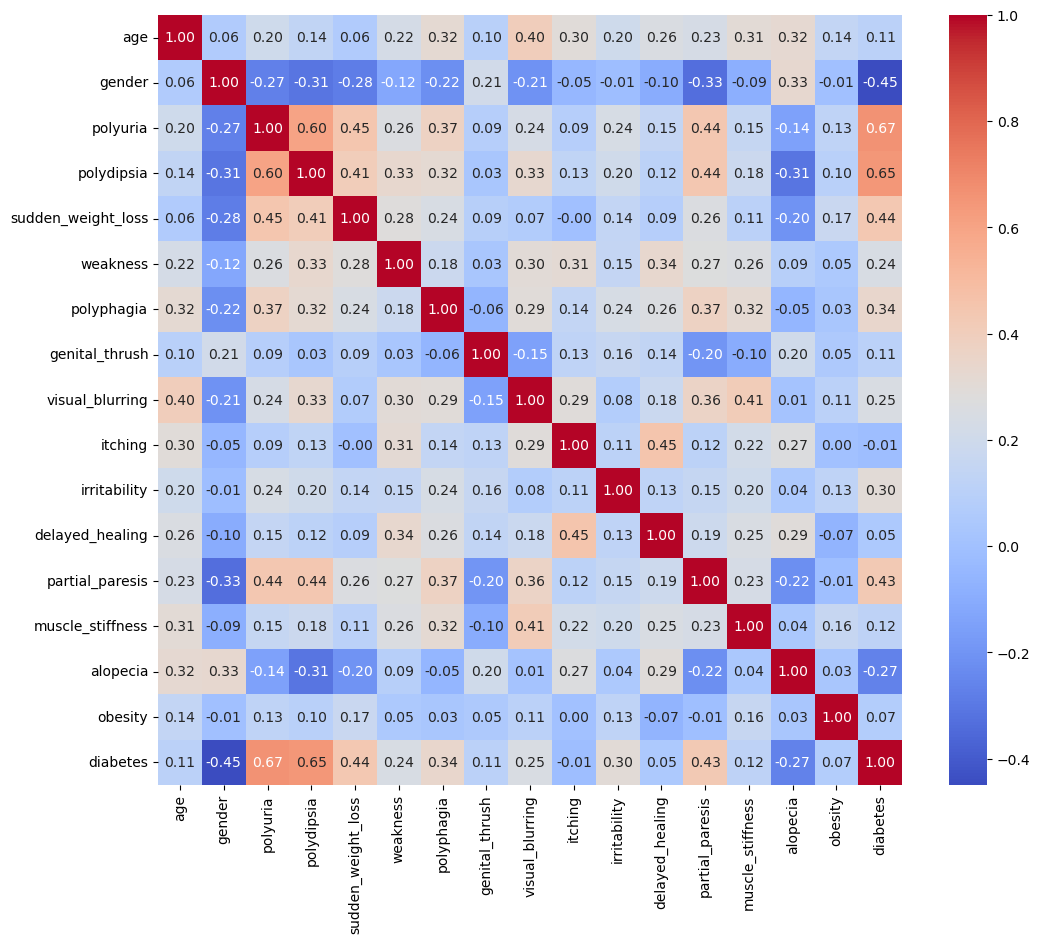

In [22]:
# Load necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation matrix visualized
corr_matrix = diabetes_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [23]:
# List all the symptom columns (ignore age, gender, and class)
symptom_cols = []
for col in diabetes.columns:
    if col not in ['age', 'gender', 'class']:
        symptom_cols.append(col)


# Get value counts for each symptom
value_counts_sym = diabetes[symptom_cols].apply(pd.Series.value_counts)
value_counts_sym

,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
No,262,287,303,215,283,404,287,267,394,281,296,325,341,432
Yes,258,233,217,305,237,116,233,253,126,239,224,195,179,88


In [24]:
# Calculate prevalence (%) of "Yes" responses for each symptom column
symptom_prevalence = (
    (diabetes[symptom_cols] == "Yes").sum() / len(diabetes) * 100
).sort_values(ascending=False)

print("Top 5 Most Common Symptoms Overall (%):\n", symptom_prevalence.head(5))

Top 5 Most Common Symptoms Overall (%):
 weakness           58.653846
polyuria           49.615385
itching            48.653846
delayed_healing    45.961538
polyphagia         45.576923
dtype: float64


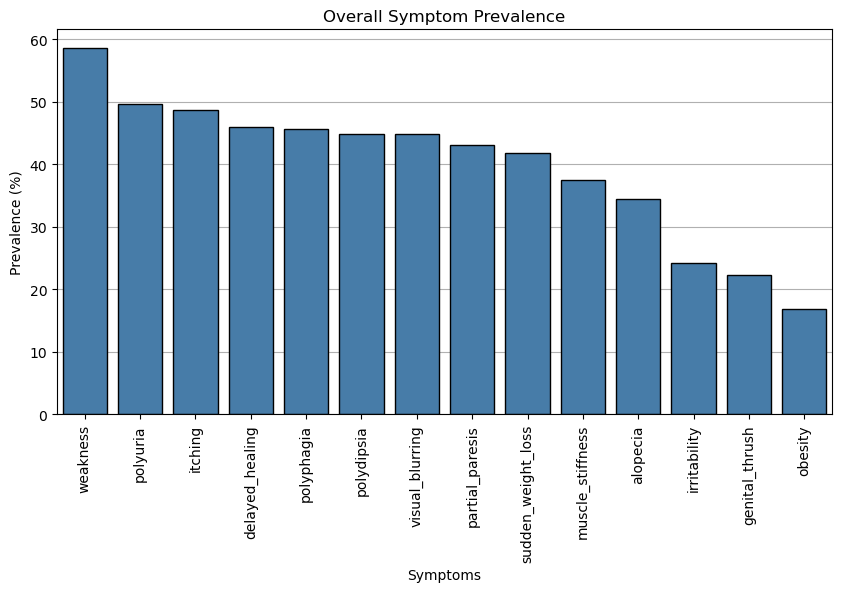

In [25]:
#  Visualization: Overall symptom prevalence amongst all participants 

plt.figure(figsize=(10,5))
sns.barplot(x=symptom_prevalence.index, y=symptom_prevalence.values, color="#377eb8", edgecolor='black', zorder=2)
plt.grid(axis='y', zorder=1)
plt.xticks(rotation=90)
plt.ylabel("Prevalence (%)")
plt.xlabel("Symptoms")
plt.title("Overall Symptom Prevalence")
plt.show()

=== Symptom Differences by Gender (Diabetic Patients Only) ===

In [26]:
# Subset diabetics only
diabetes_diabetic = diabetes[diabetes["class"].str.strip().str.lower() == "positive"]


In [27]:
# Compute symptom frequencies (percentage of "Yes") by gender
crosstab_gender = (
    diabetes_diabetic.groupby("gender")[symptom_cols]
    .apply(lambda x: (x == "Yes").sum() / len(x) * 100)
    .T
)

# Display formatted
display(crosstab_gender.round(1))

gender,Female,Male
polyuria,74.6,77.6
polydipsia,72.3,68.0
sudden_weight_loss,65.9,50.3
weakness,67.6,68.7
polyphagia,65.9,51.0
genital_thrush,9.8,44.9
visual_blurring,60.1,48.3
itching,50.3,45.6
irritability,27.2,42.9
delayed_healing,50.9,44.2


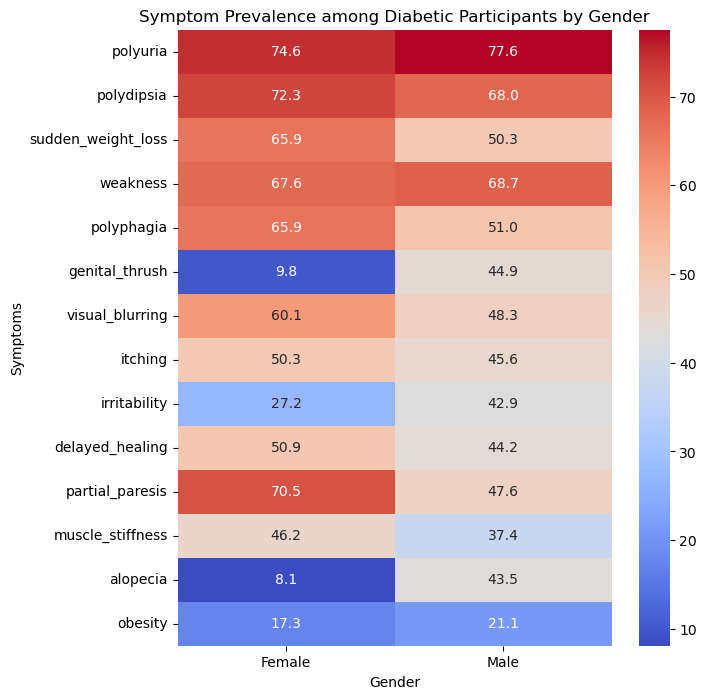

In [28]:
#  Visualization: heatmap of gender differences 
plt.figure(figsize=(7,8))
sns.heatmap(crosstab_gender, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Symptom Prevalence among Diabetic Participants by Gender")
plt.ylabel("Symptoms")
plt.xlabel ("Gender")
plt.show()

In [29]:
# Gender-based differences (absolute % difference between male and female)
diff_by_gender = (
    (crosstab_gender["Male"] - crosstab_gender["Female"])
    .abs()
    .sort_values(ascending=False)
)

print("Symptoms with Largest Gender Differences (Absolute % Difference):")
display(diff_by_gender.head(5))

Symptoms with Largest Gender Differences (Absolute % Difference):


alopecia              35.444929
genital_thrush        35.071370
partial_paresis       22.901184
irritability          15.689513
sudden_weight_loss    15.555818
dtype: float64

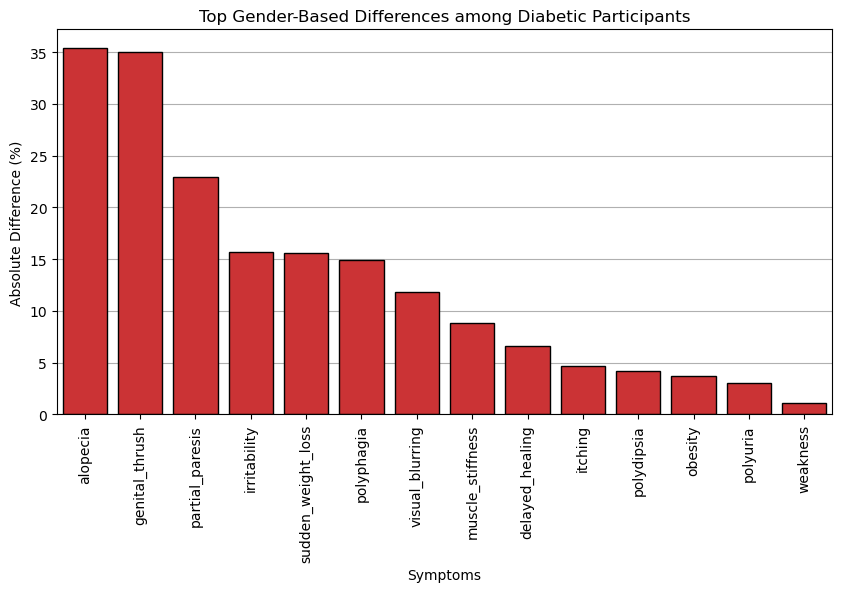

In [30]:
# Visualization: barplot of gender differences 
plt.figure(figsize=(10,5))
sns.barplot(x=diff_by_gender.index, y=diff_by_gender.values, color="#e41a1c",edgecolor='black', zorder=2)
plt.grid(axis='y', zorder=1)
plt.xticks(rotation=90)
plt.ylabel("Absolute Difference (%)")
plt.xlabel("Symptoms")
plt.title("Top Gender-Based Differences among Diabetic Participants")
plt.show()

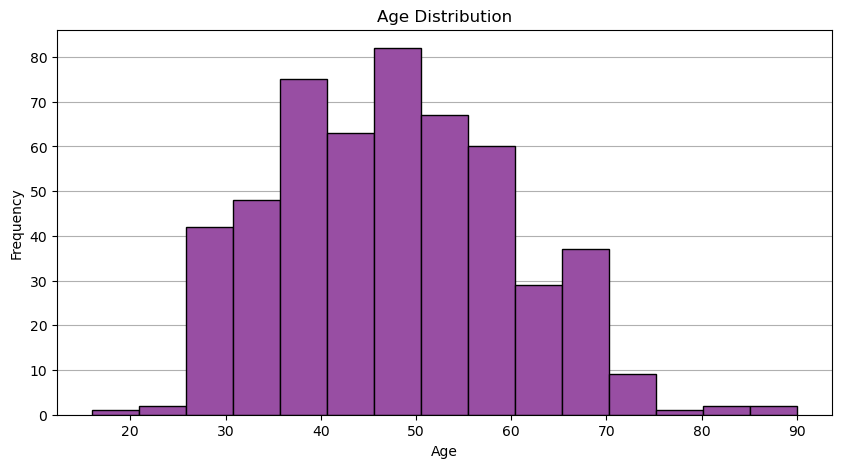

In [31]:
# Histogram to view Age distribution
plt.figure(figsize=(10,5))
plt.hist(diabetes['age'], bins=15, edgecolor='black', color="#984ea3", zorder=2)
plt.grid(axis='y', zorder=1)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

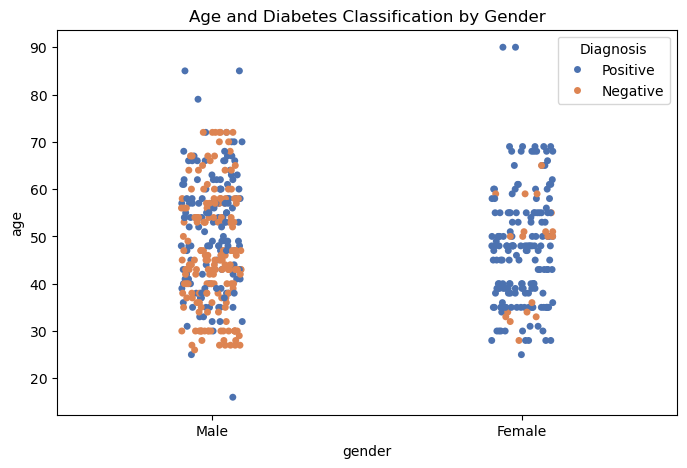

In [32]:
# Visualization: Age and Diabetes Classification by Gender

plt.figure(figsize=(8,5))
sns.stripplot(data=diabetes, x='gender', y='age', hue='class', jitter=True, palette='deep')
plt.title('Age and Diabetes Classification by Gender')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

                    % without Diabetes  % with Diabetes
polyuria                           7.5             75.9
polydipsia                         4.0             70.3
sudden_weight_loss                14.5             58.8
weakness                          43.5             68.1
polyphagia                        24.0             59.1
genital_thrush                    16.5             25.9
visual_blurring                   29.0             54.7
itching                           49.5             48.1
irritability                       8.0             34.4
delayed_healing                   43.0             47.8
partial_paresis                   16.0             60.0
muscle_stiffness                  30.0             42.2
alopecia                          50.5             24.4
obesity                           13.5             19.1


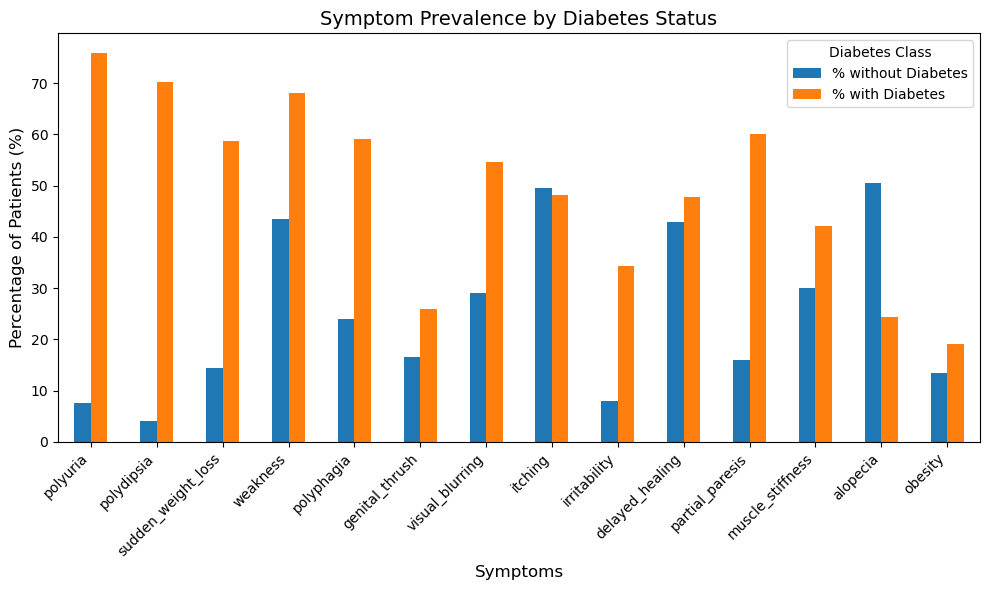

In [34]:
# Visualization: Symptom Prevalence by Diabetes Status

# Group data by diabetes status and calculate the mean prevalence of each symptom
symptom_summary = diabetes_encoded.groupby('diabetes')[symptom_cols].mean().T * 100

# Rename columns for clarity in the plot
symptom_summary.columns = ['% without Diabetes', '% with Diabetes']

# Show the rounded summary table 
print(symptom_summary.round(1))

# Plot grouped bar chart
symptom_summary.plot(kind='bar', figsize=(10, 6), grid=False)

# Add labels and formatting
plt.title('Symptom Prevalence by Diabetes Status', fontsize=14)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Percentage of Patients (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diabetes Class')
plt.tight_layout()
plt.show()